In [158]:
#import kniznic
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import _tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.metrics import confusion_matrix

import pydotplus
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image

In [159]:
#nacitanie datasetu
dataset = pd.read_csv("udemy_courses.csv",sep=",")

In [160]:
dataset

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [161]:
#odstranenie nepotrebnych stlpcov
cleaned_dataset = dataset.drop(["course_title","published_timestamp","course_id","url","num_lectures","is_paid"],axis=1);

In [162]:
cleaned_dataset

,price,num_subscribers,num_reviews,level,content_duration,subject
0,200,2147,23,All Levels,1.5,Business Finance
1,75,2792,923,All Levels,39.0,Business Finance
2,45,2174,74,Intermediate Level,2.5,Business Finance
3,95,2451,11,All Levels,3.0,Business Finance
4,200,1276,45,Intermediate Level,2.0,Business Finance
...,...,...,...,...,...,...
3673,100,1040,14,All Levels,2.0,Web Development
3674,25,306,3,Beginner Level,3.5,Web Development
3675,40,513,169,All Levels,3.5,Web Development
3676,50,300,31,All Levels,3.0,Web Development


In [163]:
cleaned_dataset.head()

,price,num_subscribers,num_reviews,level,content_duration,subject
0,200,2147,23,All Levels,1.5,Business Finance
1,75,2792,923,All Levels,39.0,Business Finance
2,45,2174,74,Intermediate Level,2.5,Business Finance
3,95,2451,11,All Levels,3.0,Business Finance
4,200,1276,45,Intermediate Level,2.0,Business Finance


In [164]:
cleaned_dataset.level.unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [165]:
cleaned_dataset.subject.unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [166]:
#popis dat
cleaned_dataset.describe()

,price,num_subscribers,num_reviews,content_duration
count,3678.000000,3678.000000,3678.000000,3678.000000
mean,66.049483,3197.150625,156.259108,4.094517
std,61.005755,9504.117010,935.452044,6.053840
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,111.000000,4.000000,1.000000
50%,45.000000,911.500000,18.000000,2.000000
75%,95.000000,2546.000000,67.000000,4.500000
max,200.000000,268923.000000,27445.000000,78.500000


In [167]:
#prevediem kategoricke premenne na ciselne
courses = pd.get_dummies(cleaned_dataset,columns=["level"] ,drop_first=False)
courses

,price,num_subscribers,num_reviews,content_duration,subject,level_All Levels,level_Beginner Level,level_Expert Level,level_Intermediate Level
0,200,2147,23,1.5,Business Finance,1,0,0,0
1,75,2792,923,39.0,Business Finance,1,0,0,0
2,45,2174,74,2.5,Business Finance,0,0,0,1
3,95,2451,11,3.0,Business Finance,1,0,0,0
4,200,1276,45,2.0,Business Finance,0,0,0,1
...,...,...,...,...,...,...,...,...,...
3673,100,1040,14,2.0,Web Development,1,0,0,0
3674,25,306,3,3.5,Web Development,0,1,0,0
3675,40,513,169,3.5,Web Development,1,0,0,0
3676,50,300,31,3.0,Web Development,1,0,0,0


In [168]:
#trenovacie testovacie data
#X_train = všetko okrem label lebo to su popisne data
#y_train = do ktorych kategorii chcem klasifikator urobit
#test_size 80: 20 (2942 trenovacie: 735 testovacie)
X_train, X_test, y_train, y_test = train_test_split(courses[
                                                    ['level_All Levels', 'level_Beginner Level', 'level_Expert Level',
                                                     'level_Intermediate Level','price','num_subscribers','num_reviews']], 
                                                    courses['subject'], test_size = 0.2)

In [169]:
clf = DecisionTreeClassifier()

In [170]:
clf = clf.fit(X_train,y_train)

In [171]:
y_pred = clf.predict(X_test)

In [172]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.43478260869565216


In [173]:
print(confusion_matrix(y_test, y_pred))

[[107  44  37  51]
 [ 39  33  31  31]
 [ 42  26  39  15]
 [ 57  23  20 141]]


In [174]:
X_train = courses[['level_All Levels', 'level_Beginner Level', 'level_Expert Level',
                                                     'level_Intermediate Level','price','num_subscribers','num_reviews']]
y_train =courses['subject']

In [175]:
clf = DecisionTreeClassifier(max_leaf_nodes=12)

In [176]:
clf = clf.fit(X_train,y_train)

In [177]:
vlastnosti = ['level_All Levels', 'level_Beginner Level', 'level_Expert Level',
                                                     'level_Intermediate Level','price','num_subscribers','num_reviews']

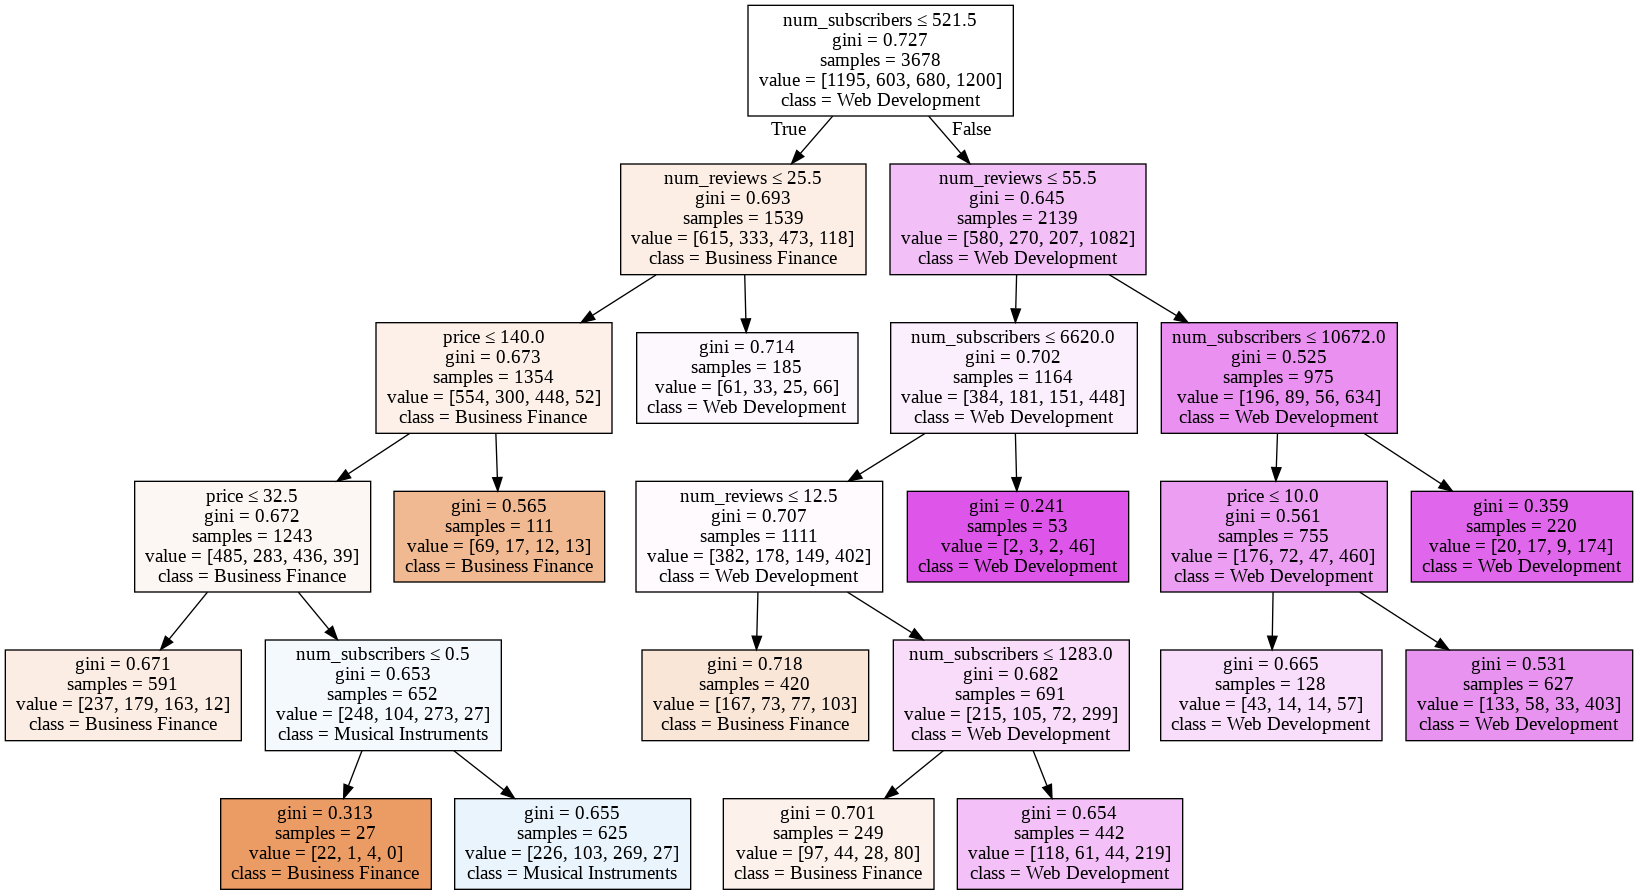

In [178]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=False,
                special_characters=True,feature_names = vlastnosti,class_names=['Business Finance', 'Graphic Design', 'Musical Instruments','Web Development'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('skuska.png')
Image(graph.create_png())

In [179]:
def tree_to_code(tree, feature_names, Y):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    pathto=dict()

    global k
    k = 0
    def recurse(node, depth, parent):
        global k
        indent = "  " * depth

        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            s= "{} <= {} ".format( name, threshold, node )
            if node == 0:
                pathto[node]=s
            else:
                pathto[node]=pathto[parent]+' & ' +s

            recurse(tree_.children_left[node], depth + 1, node)
            s="{} > {}".format( name, threshold)
            if node == 0:
                pathto[node]=s
            else:
                pathto[node]=pathto[parent]+' & ' +s
            recurse(tree_.children_right[node], depth + 1, node)
        else:
            k=k+1
            print(k,')',pathto[parent], tree_.value[node])
    recurse(0, 1, 0)

In [180]:
tree_to_code(clf, vlastnosti, y_train)

1 ) num_subscribers <= 521.5  & num_reviews <= 25.5  & price <= 140.0  & price <= 32.5  [[237. 179. 163.  12.]]
2 ) num_subscribers <= 521.5  & num_reviews <= 25.5  & price <= 140.0  & price > 32.5 & num_subscribers <= 0.5  [[22.  1.  4.  0.]]
3 ) num_subscribers <= 521.5  & num_reviews <= 25.5  & price <= 140.0  & price > 32.5 & num_subscribers > 0.5 [[226. 103. 269.  27.]]
4 ) num_subscribers <= 521.5  & num_reviews <= 25.5  & price > 140.0 [[69. 17. 12. 13.]]
5 ) num_subscribers <= 521.5  & num_reviews > 25.5 [[61. 33. 25. 66.]]
6 ) num_subscribers > 521.5 & num_reviews <= 55.5  & num_subscribers <= 6620.0  & num_reviews <= 12.5  [[167.  73.  77. 103.]]
7 ) num_subscribers > 521.5 & num_reviews <= 55.5  & num_subscribers <= 6620.0  & num_reviews > 12.5 & num_subscribers <= 1283.0  [[97. 44. 28. 80.]]
8 ) num_subscribers > 521.5 & num_reviews <= 55.5  & num_subscribers <= 6620.0  & num_reviews > 12.5 & num_subscribers > 1283.0 [[118.  61.  44. 219.]]
9 ) num_subscribers > 521.5 & num